# **Lab 2 : False Position and Secant method**<br>

The False Position method is one of the methods of finding roots of a non-linear function. Similar to the Bisection method, it falls under the category of **Bracketing methods** since the initial boundary guesses, x<sub>l</sub> and x<sub>u</sub>, must bracket the actual root. And the assumption here is that the function is real continuous, otherwise the False position method wouldn't work. The main difference between the Bisection method and False position method is that it takes advantage of the fact that one of the boundary values, either x<sub>l</sub> or x<sub>u</sub>, would have their functional value be closer to the zero of the function, and this would result in the new estimation x<sub>r</sub> be closer to one of the bracketing values than the mid-point x<sub>m</sub>.

In today's lab, we will be implementing the False position method in python. Just like in the previous lab for Bisection method, we will be considering the function f(x) as an array of coefficients, for instance if we want to have f(x) = 0.5x<sup>3</sup>-2x+5, then in python we will create an array as follows:


In [ ]:
f = [0.5,0,-2,5]

Note that your implementation should be able to handle the array f of any size,which means it should be able to find the root of any given polynomial. But for testing purposes, you can use the array f given here.

Next, you will need to create a user-defined function as follows
```
func(f, x)
```
This function will take the coefficent array f and a point x as input and evaluate the value of the function at that point x using a loop and return that value. This function will be called in the other function that you will implement, which is as follows:
```
falseposition(f, xl, xu, epsilon)
```
This function will return the root of the equation represented by the array f and in case it does not reach the root exactly then it will return the close enough value to the root that has an absolute relative approximate error of at most epsilon (%).

##Task 1
Implement the function for False position method following the requirements set earlier. Write a script after the function to call it and test whether it is working correctly. For the function given above, there is only one real root and it is -2.761.

In [ ]:
f = [0.5,0,-2,5]
g=[1,1,0,-3]
# Write a function to return the value of the polynomial at the point x
def func(f, x):
    sum=0
    y=1
    for i in f[::-1]:
        sum+=i*y
        y*=x
    # print(sum,y)
    return sum

#Complete the following function

def false_position(equ,f, xl, xu, epsilon):
    fa = equ(f,xl)
    fb = equ(f,xu)
    if fa * fb > 0:
        raise ValueError("The function must have opposite signs at the interval bounds.")
    c = xu - fb * (xu - xl) / (fb - fa)
    fc = equ(f,c)
    while abs(fc) > epsilon:
        if fa * fc < 0:
            xu = c
            fb = fc
        else:
            xl = c
            fa = fc
        c = xu - fb * (xu - xl) / (fb - fa)
        fc = equ(f,c)
    return c

#Write a driver code here for calling the function and testing it
print(false_position(func,f,-3,-2,0.0001))
print(false_position(func,g,0,3,0.0001))


-2.760809060655936
1.1745490481974536


In case you do not remember how graphs can be plotted in Python, here is a sample code showing how to do it using the matplotlib library.

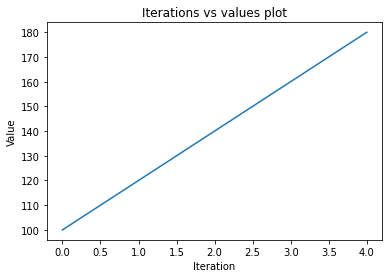

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iters = np.arange(0, 5) #start=0, stop=5, and since no step is given, so default step=1
vals = np.arange(100, 200, 20) #start=100, stop=200, step=20

plt.plot(iters, vals)
plt.title("Iterations vs values plot")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

## Task 2
Generate a plot of **iteration vs relative approx error (%)** for the False Position method function you implemented earlier.

-2.760816781288845
716
[0.510969293995705, 0.5038758518766673, 0.4968540664195715, 0.48990362357398165, 0.48302421644503, 0.4762155442997336, 0.4694773116213706, 0.46280922721121476, 0.45621100333625697, 0.4496823549219809, 0.4432229987891906, 0.43683265293385787, 0.43051103584865974, 0.42425786588564507, 0.41807286065852045, 0.41195573648385475, 0.405906207859828, 0.3999239869819072, 0.394008783293935, 0.38816030307393284, 0.382378249053429, 0.3766623200691789, 0.3710122107466059, 0.3654276112132715, 0.3599082068420674, 0.35445367802255695, 0.34906369995966846, 0.34373794249867695, 0.3384760699753794, 0.33327774109070907, 0.328142608808314, 0.3230703202746217, 0.31806051676005, 0.3131128336205823, 0.30822690027853156, 0.30340234022191753, 0.29863877102102404, 0.2939358043617375, 0.28929304609425094, 0.28471009629681954, 0.2801865493530437, 0.2757219940423811, 0.27131601364282976, 0.26696818604486194, 0.26267808387606034, 0.258445274635453, 0.25426932083690984, 0.2501497801609144, 0.24

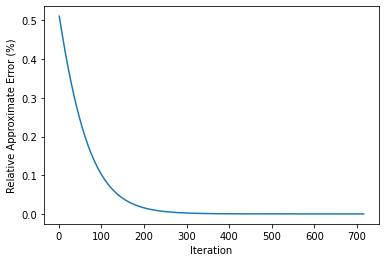

In [ ]:
# Write your code for generating the graph here
import matplotlib.pyplot as plt

f = [0.5,0,-2,5]
g=[1,1,0,-3]

def func(f, x):
    sum=0
    y=1
    for i in f[::-1]:
        sum+=i*y
        y*=x
    return sum

def false_position(equ,f, xl, xu, epsilon):
    fa = equ(f,xl)
    fb = equ(f,xu)
    if fa * fb > 0:
        raise ValueError("The function must have opposite signs at the interval bounds.")
    c = xu - fb * (xu - xl) / (fb - fa)
    fc = equ(f,c)
    global iters,relative_error
    iters = 0
    relative_error = []
    while abs(fc) > epsilon:
        if fa * fc < 0:
            xu = c
            fb = fc
        else:
            xl = c
            fa = fc
        c_prev = c
        c = xu - fb * (xu - xl) / (fb - fa)
        fc = equ(f,c)
        iters += 1
        relative_error.append(abs((c - c_prev) / c) * 100)
    return c

print(false_position(func,f,-30,-2,0.00001))
print(iters)
print(relative_error)

# Plot the iteration vs relative approximate error
plt.plot(range(1, iters + 1), relative_error)
plt.xlabel("Iteration")
plt.ylabel("Relative Approximate Error (%)")
plt.show()

# **Secant method**
The Secant method is another method of finding roots of a nonlinear function. Unlike the Bisection and False position method, it falls under the category of **Open methods** due to the fact that we only need two initial guesses that do not have to bracket the actual root. Secant method works by approximating the derivative that is used in **Newton Raphson method**.

## Task 3
Implement the Secant method for the above function and write a script for testing its implementation. The actual root is -2.761, and you can take the initial guesses for the secant as 2 and 3.

In [ ]:
Xi = 2
Xi_prev = 3
epsilon = 0.01
def func(f, x):
    sum=0
    y=1
    for i in f[::-1]:
        sum+=i*y
        y*=x
    return sum
def secant(equ, f, Xi, Xi_prev, epsilon):
    f_Xi = equ(f, Xi)
    f_Xi_prev = equ(f, Xi_prev)
    while abs(f_Xi) > epsilon:
        Xi_temp = Xi
        Xi = Xi - (Xi - Xi_prev) * f_Xi / (f_Xi - f_Xi_prev)
        Xi_prev = Xi_temp
        f_Xi = equ(f, Xi)
        f_Xi_prev = equ(f, Xi_prev)
    return Xi

# Write a script here for calling the above function
f = [0.5,0,-2,5]
g=[1,1,0,-3]
print(secant(func,f, Xi, Xi_prev, epsilon))
print(secant(func,g, 5, -10, 0.001))

-2.761072404598563
1.1745640953279801


## Task 4
Plot the **iteration vs absolute relative approximate error (%)** curves for both False position method and Secant method in the same graph and see which one converges faster.

4 4
[3.0789825970548867, 0.3084903125597002, 0.030159779492766336, 0.0029413967335756284] [12.500000000000005, 3.0789825970548867, 0.356360950025884, 0.014668519375757357]


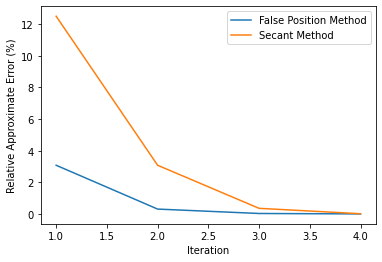

In [ ]:
import matplotlib.pyplot as plt

f = [0.5,0,-2,5]
g=[1,1,0,-3]

def func(f, x):
    sum=0
    y=1
    for i in f[::-1]:
        sum+=i*y
        y*=x
    return sum

# False Position Method function
def false_position(equ,f, xl, xu, epsilon):
    fa = equ(f,xl)
    fb = equ(f,xu)
    if fa * fb > 0:
        raise ValueError("The function must have opposite signs at the interval bounds.")
    c = xu - fb * (xu - xl) / (fb - fa)
    fc = equ(f,c)
    iterations = 0
    relative_error = []
    while abs(fc) > epsilon:
        if fa * fc < 0:
            xu = c
            fb = fc
        else:
            xl = c
            fa = fc
        c_prev = c
        c = xu - fb * (xu - xl) / (fb - fa)
        fc = equ(f,c)
        iterations += 1
        relative_error.append(abs((c - c_prev) / c) * 100)
    return c,iterations,relative_error

# Secant Method function
def secant(equ, f, Xi, Xi_prev, epsilon):
    f_Xi = equ(f, Xi)
    f_Xi_prev = equ(f, Xi_prev)
    iterations = 0
    relative_error = []
    while abs(f_Xi) > epsilon:
        Xi_temp = Xi
        Xi = Xi - (Xi - Xi_prev) * f_Xi / (f_Xi - f_Xi_prev)
        Xi_prev = Xi_temp
        f_Xi = equ(f, Xi)
        f_Xi_prev = equ(f, Xi_prev)
        iterations += 1
        relative_error.append(abs((Xi - Xi_prev) / Xi) * 100)
    return Xi,iterations,relative_error

# Plot the iteration vs relative approximate error
False_position_method = false_position(func,f,-3,-2,0.0001)
Secant_method = secant(func,f, -3, -2, 0.0001)

print(False_position_method[1],Secant_method[1])
print(False_position_method[2],Secant_method[2])

plt.plot(range(1, False_position_method[1] + 1), False_position_method[2], label="False Position Method")
plt.plot(range(1, Secant_method[1] + 1), Secant_method[2], label="Secant Method")
plt.xlabel("Iteration")
plt.ylabel("Relative Approximate Error (%)")
plt.legend()
plt.show()